# Centroid digits of MNIST 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist # Importing mnist dataset from keras(Tensorflow)

# loading mnist dataset and split it into train_x, train_y, test_x, test_y
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [2]:
# Printing shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


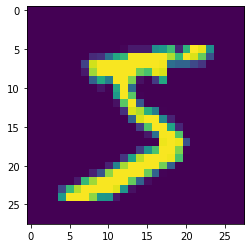

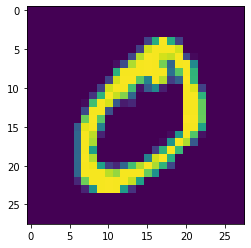

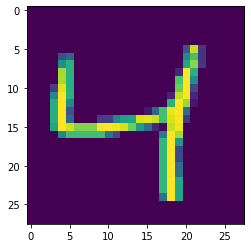

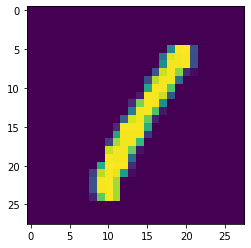

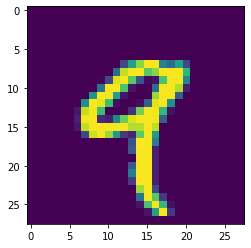

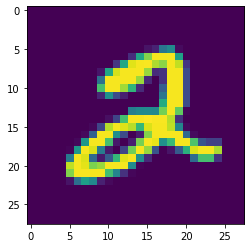

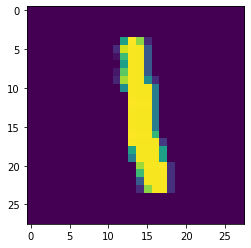

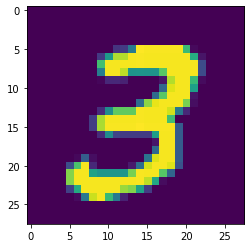

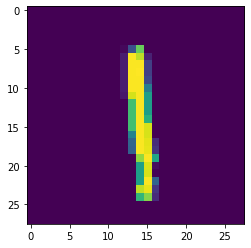

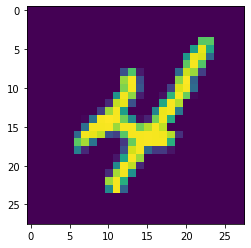

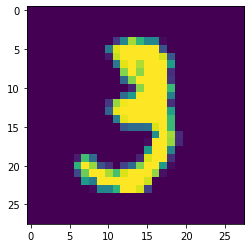

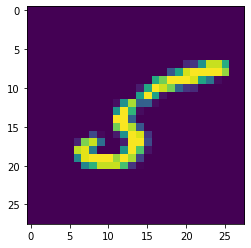

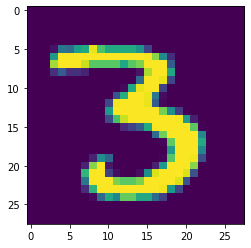

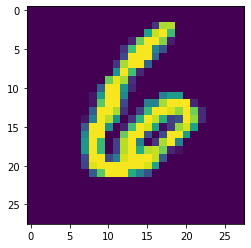

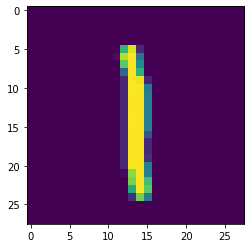

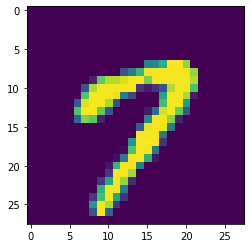

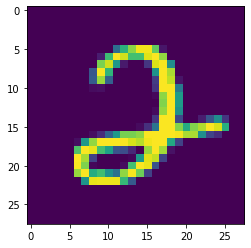

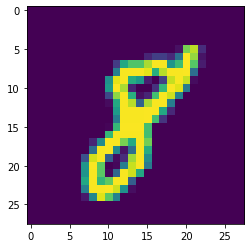

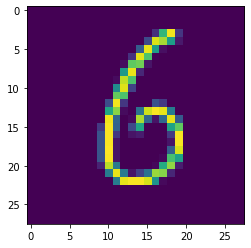

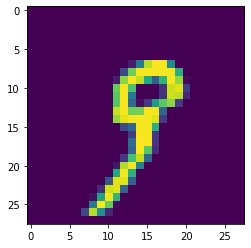

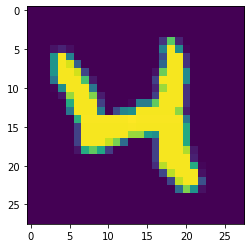

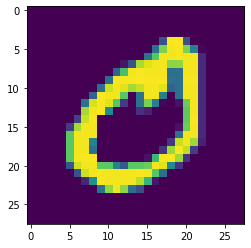

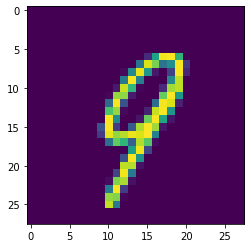

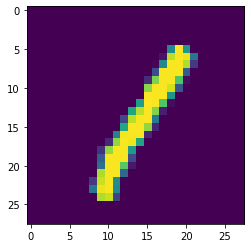

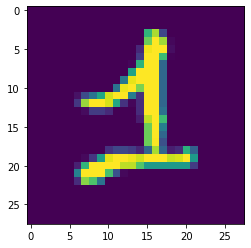

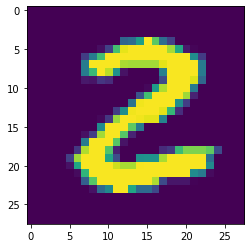

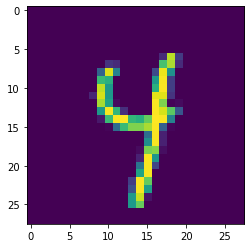

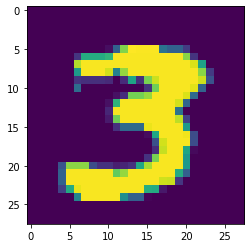

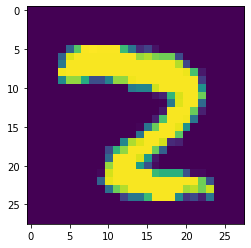

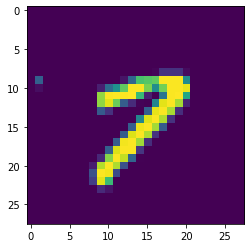

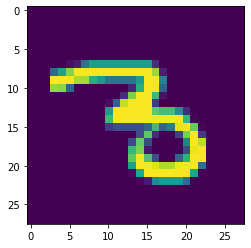

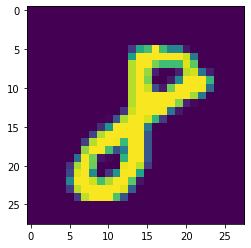

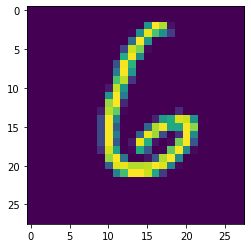

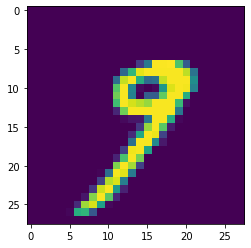

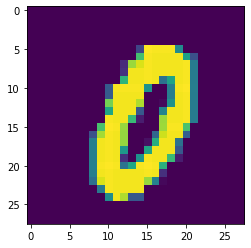

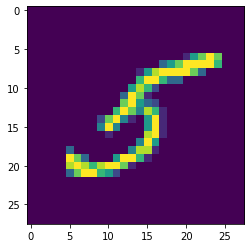

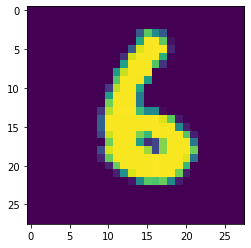

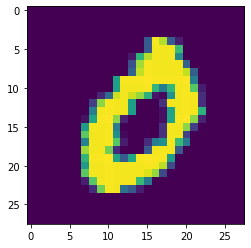

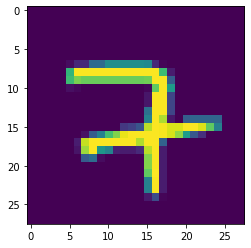

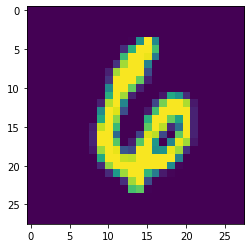

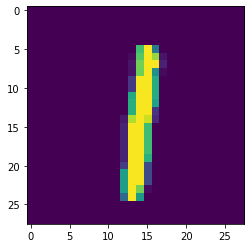

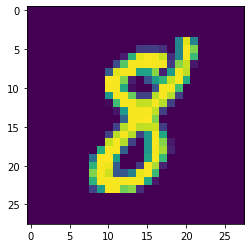

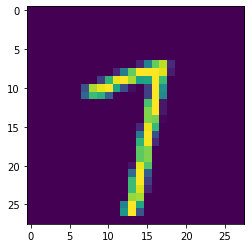

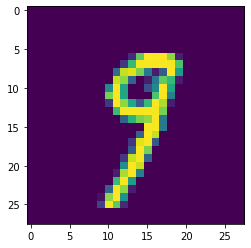

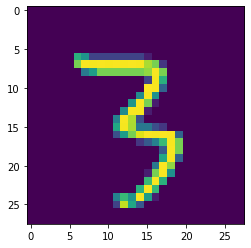

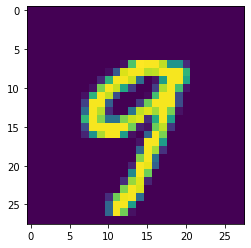

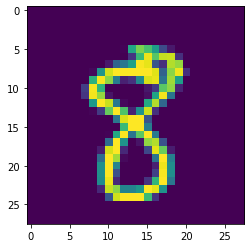

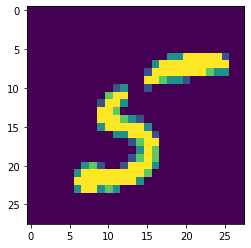

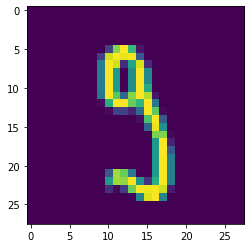

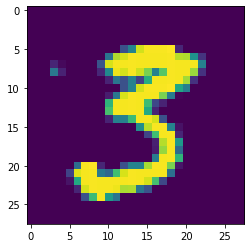

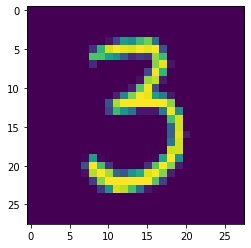

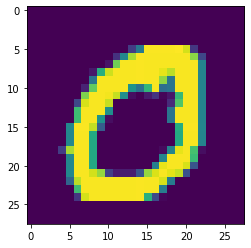

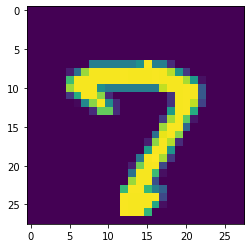

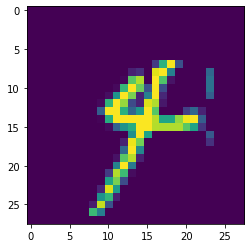

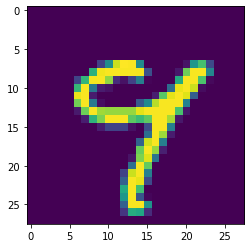

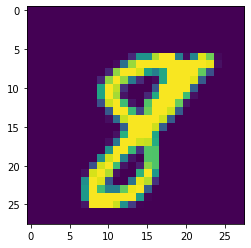

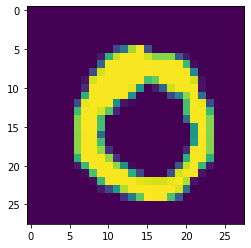

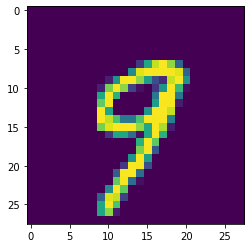

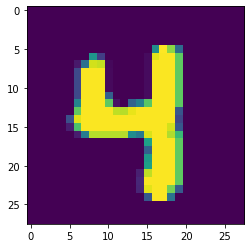

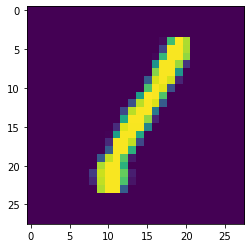

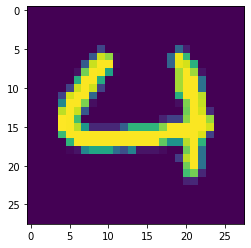

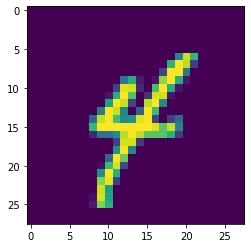

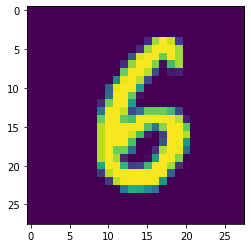

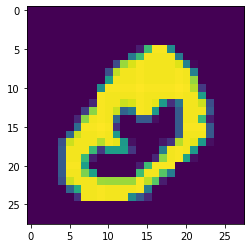

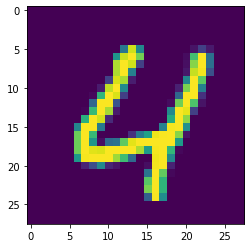

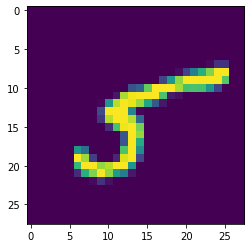

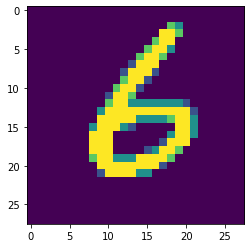

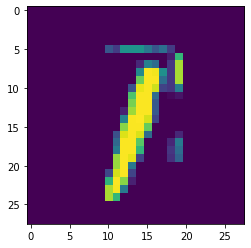

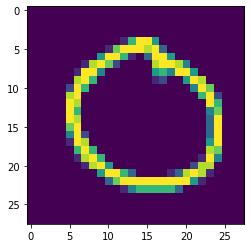

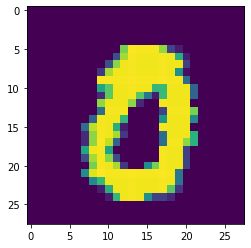

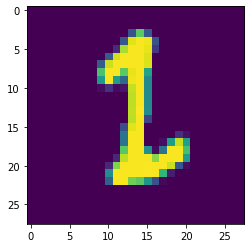

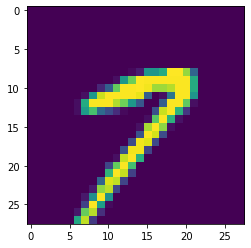

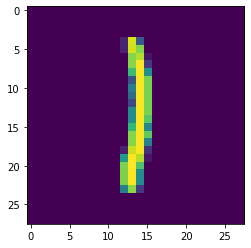

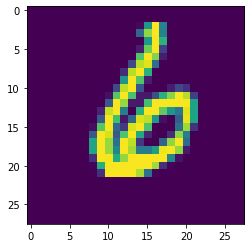

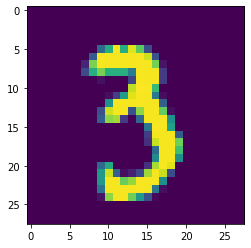

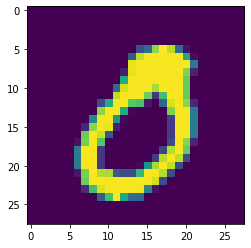

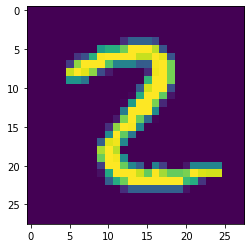

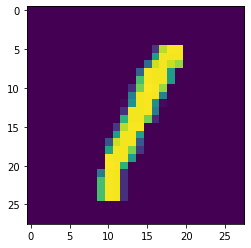

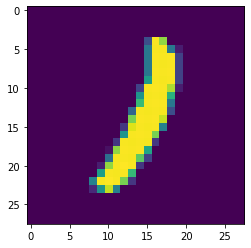

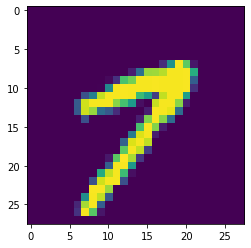

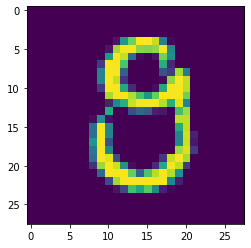

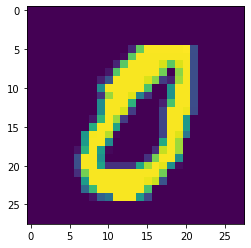

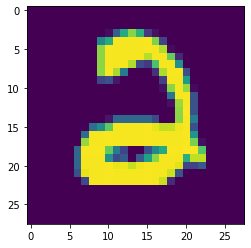

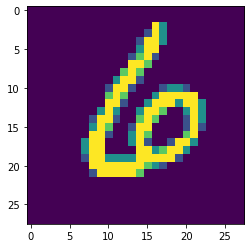

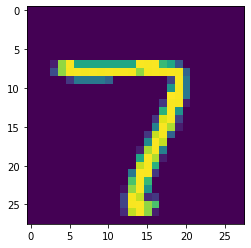

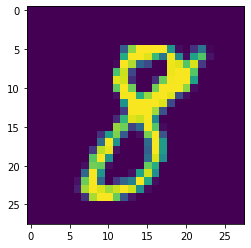

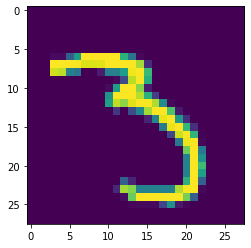

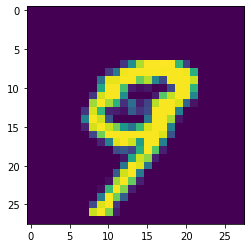

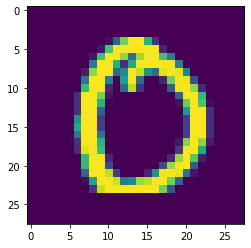

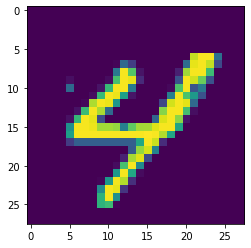

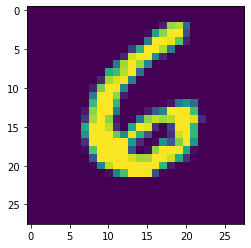

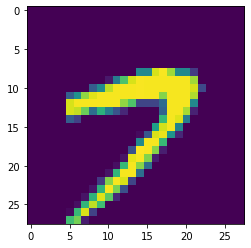

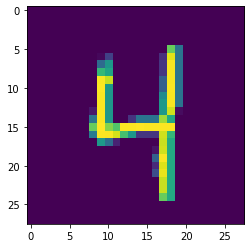

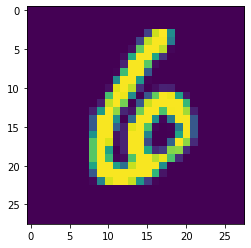

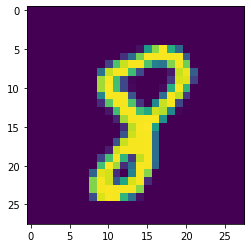

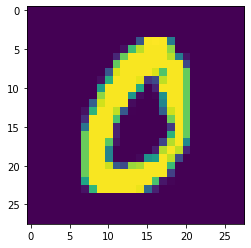

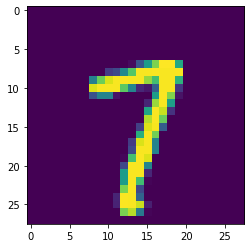

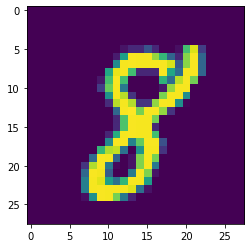

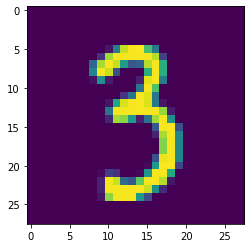

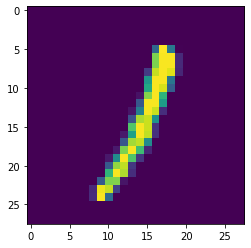

In [3]:
import matplotlib.pyplot as plt

# Plotting the first 100 samples at train_X series
for i in range(100):  
    plt.imshow(train_X[i])
    plt.show()

In [4]:
# Declaring 2 lists : The first for train and the second for test only for features X
train_features = []
test_features = []

In [5]:
# Here we'll split each image into 4-grids(2x2) grid to get centriod of each image.So we'll create the function called Get_centriod
# which hold 3 paramater (curr_image,w,h) current image, it's width and finally it's height.
# Cause we've determined to split into 4-grids(2x2) so we'll iterate 4 times
#                                         #1#2
#                                         #3#4
def Get_centroid(curr_image,w,h):
  feature_vector = []
  x1 = y1 = x2 = y2 = 0
  for item in range(4):
    if item == 0:  # If we're at first grid(#1), we'll set x1,y1 to 0 & x2,y2 to 14   
      x1 = y1 = 0
      x2 = y2 = 14
    elif item == 1: # If we're at first grid(#2), we'll set x1 to 14, y1 to 0 & x2 to 28 & y2 to 14
      x1 = 14
      y1 = 0
      x2 = 2*14  # 28
      y2 = 14
    elif item == 2:  # If we're at first grid(#3), we'll update x1 to 0, y1 to 14 & x2 to 14, y2 to 28
      x1 = 0
      y1 = 14
      x2 = 14
      y2 = 2*14
    else :            # If we're at first grid(#4), we'll update x1,y1 to 14 & x2,y2 to 28
      x1 = y1 = 14
      x2 = y2 = 2*14
    sum_x = 0
    sum_y = 0
    total_pixels = 0
    for i in range(x1,x2): # Iterate through each determined grid 
      for j in range(y1,y2):
        sum_x = sum_x + (i-x1)*curr_image[i][j] # iterate through each row to get sum the pixel of current image  
        sum_y = sum_y + (j-y1)*curr_image[i][j] # iterate through each column to get sum the pixel of current image
        total_pixels = total_pixels+curr_image[i][j] # To get total sum of pixels of each grid.
    if total_pixels != 0:  # To avoid divided by zero   
      feature_vector.append((sum_x/total_pixels)) # get centroid of x at each grid
      feature_vector.append((sum_y/total_pixels)) # get centroid of y at each grid
    else:
      # if total_pixels is equal to zero then add zero
      feature_vector.append(0)  
      feature_vector.append(0)
  return feature_vector

In [6]:
for i in range(10000): # We'll iterate through 10000; and Getting centriod of each element of train_x then add it into train_features list to fit it into model later. 
  train_features.append(Get_centroid(train_X[i],28,28))

In [7]:
for i in range(1000): # We'll iterate through 1000; and Getting centriod of each element of test_x then add it into train_features list to test it into model later.  
  test_features.append(Get_centroid(test_X[i],28,28))

In [8]:
from sklearn.neighbors import KNeighborsClassifier  # Importing KNN model 
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(train_features,train_y[:10000])  # Fit the model with train_features & the first 10000 samples train_y 
predicted_y = knn_model.predict(test_features)

In [10]:
from sklearn.metrics import accuracy_score # to get accuracy
print("Accuracy of KNN model: "+str(accuracy_score(test_y[:1000], predicted_y))) # Predict the model with the first 1000 samples of test_y & predicted_y1

Accuracy of KNN model: 0.833
